In [1]:
from bandits import *
import matplotlib.pyplot as plt
import numpy as np

0.3032437641351455
Lucb: 5952
Lucb 2: 6850
UCB: 6620


In [2]:
lucb = LUCB(nb_machine,k,casino,epsilon=epsilon,initial_credit=initialCredits)
print("Lucb:",lucb.play_all_best_from_k(initialCredits))
lucb = LUCB(nb_machine,k,casino,epsilon=5,initial_credit=initialCredits,confidence=0.5)
print("Lucb 2:",lucb.play_all_best_from_k(initialCredits))
print("UCB:", UCB(initialCredits, casino))

Lucb: 6481
Lucb 2: 6776
UCB: 6766


# First we try to find the coefficient of "confidence" which maximizes the total reward 

In [7]:
rewards, confidences = [],[]
nb_tries = 4
for i in range(20):
    c = i*0.1
    confidences.append(c)
    t = 0
    for _ in range(nb_tries):
        t += UCB(initialCredits, casino, c)
    rewards.append(t/nb_tries)

Text(0.5, 1.0, 'variation of the total rewards according to confidence')

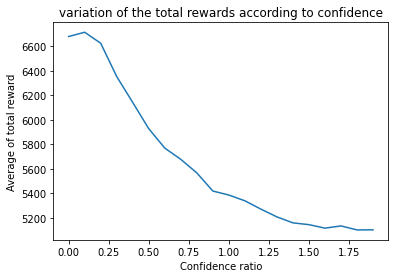

In [8]:
plt.plot(confidences,rewards)
plt.xlabel("Confidence ratio")
plt.ylabel("Average of total reward")
plt.title("variation of the total rewards according to confidence")

In [9]:
best_confidence = confidences[np.argmax(rewards)]
print("Best confidence : ", best_confidence) # Best confidence  = 0.1

Best confidence :  0.1


In [2]:
best_confidence = 0.1

In [5]:

greedy_stats = greedy(initialCredits, casino,10,return_stats=True)
epsilon_greedy_stats  = epsilon_greedy(initialCredits, casino,return_stats=True, fixed_epsilon=True, epsilon=0.4)
UCB_stats  = UCB(initialCredits, casino,confidence= best_confidence,return_stats=True)

In [6]:
#Change epsilon_greedy epsilon, the epsilon start from  1 to 1e-10
epsilon_greedy_one_stats  = epsilon_greedy(initialCredits, casino,return_stats=True, fixed_epsilon=False, epsilon=1)


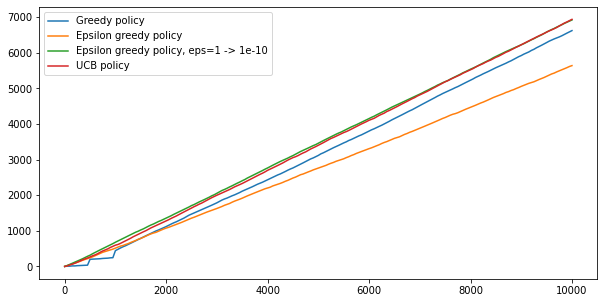

In [8]:
X_ = [i*50 for i in range(0,201)]
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(X_,greedy_stats, label="Greedy policy")
plt.plot(X_,epsilon_greedy_stats, label="Epsilon greedy policy")
plt.plot(X_,epsilon_greedy_one_stats, label="Epsilon greedy policy, eps=1 -> 1e-10")
plt.plot(X_,UCB_stats, label="UCB policy")
plt.legend()


# Conclusion: epsilon greedy policy
* Epsilon greedy is more effective if the epsilon decreases over time 
* Its efficiency reaches that of UCB 

# - An attempt to improve UCB : Lower Upper Confidence Bound (LUCB)
- The main objective of this algorithm is to find the K best arms among N arms, such that K < N.

- The main idea of the algorithm is to divide the arms into two groups at each iteration:

    - TOP group that contains the K arms with the largest estimates expectation (1 - mu).
    
    - BOTTOM group which contains the N-K arms with the smallest estimates expectation (1 - mu).



- Then, in order to perform the draw, the algorithm chooses between two elements :
    - The element of TOP having the smallest lower bound, named Lcb_arm 
    - The BOTTOM element with the largest upper bound, named Ucb_arm 

* The algorithm stops at the iteration where all the elements belonging to TOP are significantly more efficient than all the elements of BOTTOM (within an epsilon translating a possible error margin). 
* As the iterations progress, the arms change group since the estimates µi are updated at each iteration. 

# -> The purpose of this improvement is to improve the quality of statics 

* The algorithm initially seeks to establish two groups of weapons (k and (n-k)), then, exploit the statistics calculated during this phase to maximize the gain.
* For the exploitation of the results, several approaches are tested:
    - Choose the element of largest gain approximation in the TOP group.
    - Choose the item of greatest ucb in the TOP reward group.
    - Choose the best greatest reward from the k top ucb values.
    - Choose the arm with the best reward approximation from all arms.
    

# Fine tuning

* There are 3 parametters that we can play with in sake of finding the best combination:
    * Epsilon: the distance between the lowest 'lcb' of k-groupe (TOP) and the highest 'ucb' of (n-k)-groupe  (BOTTOM)
    * Confidence coeficient for ucb and lcb
    * K the number of element of the TOP groupe

In [18]:
#first example : Visualize variation of the mean reward by changing k 
L = [[],[],[],[], []]
Stats = [[],[],[],[], []]
Ks = []
for k in range(1,30,5):
    for i in range(2):
        lucb = LUCB(nb_machine,k,casino,epsilon=2.7)
        L[0].append(lucb.play_all_best_from_k(initialCredits))
        lucb = LUCB(nb_machine,k,casino,epsilon=2.7)
        L[1].append(lucb.play_all_best(initialCredits))
        
        lucb = LUCB(nb_machine,k,casino,epsilon=2.7)
        L[3].append(lucb.play_all_best_from_k_ucb(initialCredits))
        L[2].append(UCB(initialCredits, casino))
        lucb = LUCB(nb_machine,k,casino,epsilon=2.7)
        L[4].append(lucb.play_all_best_from_k_reward(initialCredits))

    for al in range(len(L)):
        Stats[al].append(np.mean(L[al]))
    Ks.append(k)

<function matplotlib.pyplot.show(close=None, block=None)>

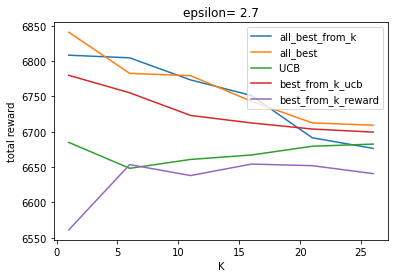

In [19]:
Labels = ["all_best_from_k", "all_best", "UCB ", "best_from_k_ucb", "best_from_k_reward"]
for i in range(5):
    plt.plot(Ks,Stats[i],label=Labels[i])
plt.legend()
plt.xlabel("K")
plt.title("epsilon= " + str(2.7))
plt.ylabel("total reward")
plt.show

# WIth this parametters, the previous implementation of UCB is a lille bit stable, but changind k impact grossly the total reward
* Next step is to variate epsilon to discover how it will be impacted 
# Let k=10 and we will try to variate the other parameters

In [20]:
# variate epsilon
L = [[],[],[],[], []]
Stats = [[],[],[],[], []]
Ks = []

confidence = 1 # For the moment
k=10
for epsilon in range(1,30,1):
    for i in range(2):
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[0].append(lucb.play_all_best_from_k(initialCredits))
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[1].append(lucb.play_all_best(initialCredits))
        
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[3].append(lucb.play_all_best_from_k_ucb(initialCredits))
        L[2].append(UCB(initialCredits, casino))
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[4].append(lucb.play_all_best_from_k_reward(initialCredits))

    for al in range(len(L)):
        Stats[al].append(np.mean(L[al]))
    Ks.append(epsilon)


<function matplotlib.pyplot.show(close=None, block=None)>

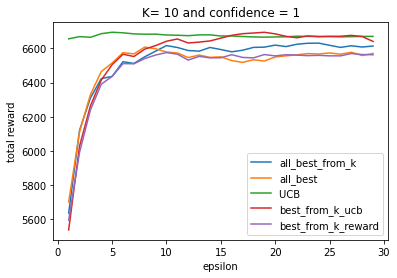

In [21]:
Labels = ["all_best_from_k", "all_best", "UCB ", "best_from_k_ucb", "best_from_k_reward"]
for i in range(5):
    plt.plot(Ks,Stats[i],label=Labels[i])

plt.legend()
plt.xlabel("epsilon")
plt.ylabel("total reward")
plt.title("K= " + str(k) + " and confidence = 1")
plt.show

# Lets try epsilon = 10; K=10 and variate confidence coeficient

In [22]:
# variate confidence 
L = [[],[],[],[], []]
Stats = [[],[],[],[], []]
Ks = []
epsilon = 10
confidences = [0.,0.1, 0.25, 0.5, 0.75, 1., 2.25, 2.5, 2.75, 3.]
k=10
for confidence in confidences:
    for i in range(4):
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[0].append(lucb.play_all_best_from_k(initialCredits))
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[1].append(lucb.play_all_best(initialCredits))
        
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[3].append(lucb.play_all_best_from_k_ucb(initialCredits))
        L[2].append(UCB(initialCredits, casino))
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[4].append(lucb.play_all_best_from_k_reward(initialCredits))

    for al in range(len(L)):
        Stats[al].append(np.mean(L[al]))


<function matplotlib.pyplot.show(close=None, block=None)>

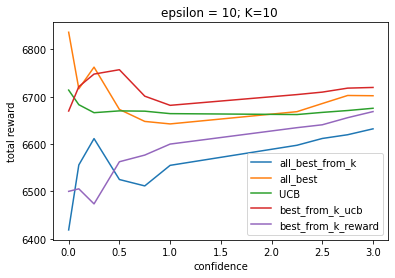

In [24]:
Labels = ["all_best_from_k", "all_best", "UCB ", "best_from_k_ucb", "best_from_k_reward"]
for i in range(5):
    plt.plot(confidences,Stats[i],label=Labels[i])

plt.legend()
plt.xlabel("confidence")
plt.ylabel("total reward")
plt.title("epsilon = 10; K=10 ")
plt.show

# Over all versions, confidence = 0.25 is the best for epsilon = [ 5,10]; K=10 

In [30]:
# Lets comare this version ( epsilon = 10; K=10; confidence=0.25) with the previous version of UCB

L = [[],[]]
k =10
for i in range(50):
    lucb = LUCB(nb_machine,k,casino,epsilon=5, confidence=0.25)
    L[1].append(lucb.play_all_best(initialCredits))
    L[0].append(UCB(initialCredits, casino))

In [33]:
print("UCB :" ,np.mean(L[0]))
print("LUCB :", np.mean(L[1]))

UCB : 6662.55
LUCB : 6684.9


<BarContainer object of 2 artists>

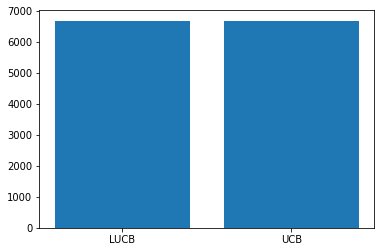

In [34]:
plt.bar(['LUCB','UCB'], [np.mean(L[0]),np.mean(L[1])])

In [6]:
# variate confidence 
L = [[],[],[],[], []]
Stats = [[],[],[],[], []]
Ks = []
epsilon = 5
confidences = [0.,0.1, 0.25, 0.5, 0.75, 1., 2.25, 2.5, 2.75, 3.]
k=10
for confidence in confidences:
    for i in range(4):
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[0].append(lucb.play_all_best_from_k(initialCredits))
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[1].append(lucb.play_all_best(initialCredits))
        
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[3].append(lucb.play_all_best_from_k_ucb(initialCredits))
        L[2].append(UCB(initialCredits, casino))
        lucb = LUCB(nb_machine,k,casino,epsilon=epsilon, confidence=confidence)
        L[4].append(lucb.play_all_best_from_k_reward(initialCredits))

    for al in range(len(L)):
        Stats[al].append(np.mean(L[al]))



<function matplotlib.pyplot.show(close=None, block=None)>

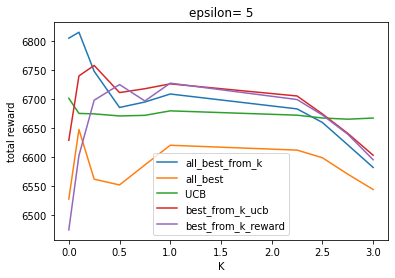

In [7]:
Labels = ["all_best_from_k", "all_best", "zUCB ", "best_from_k_ucb", "best_from_k_reward"]
for i in range(5):
    plt.plot(confidences,Stats[i],label=Labels[i])

plt.legend()
plt.xlabel("K")
plt.ylabel("total reward")
plt.title("epsilon= " + str(epsilon))
plt.show

# best_from_k_ucb and best_from_k_reward give better performances